In [1]:
# This is a demo for K-means clustering.
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# define an array of inputs
inputs = np.array([(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (4, 2), (4, 3), (4, 4), (5, 2), (5, 3), (5, 4)])

In [3]:
x_coord, y_coord = inputs.T

In [4]:
# define the number of clusters
k = 2

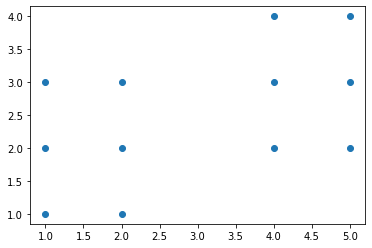

In [5]:
plt.scatter(x_coord, y_coord)

In [6]:
# randomly initialize cluster means
index1_mean, index2_mean = 0, 1

In [7]:
# Calculate the euclidean distance
def find_euclidean_distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

In [29]:
# Assignment of points to clusters
def assign_points_to_clusters(inputs, cluster1_mean, cluster2_mean):
    cluster1, cluster2 = list(), list()
    labels = list()
    for i in range(inputs.shape[0]):
        if find_euclidean_distance(cluster1_mean, inputs[i]) < find_euclidean_distance(cluster2_mean, inputs[i]):
            cluster1.append(inputs[i])
            labels.append(0)
        elif find_euclidean_distance(cluster1_mean, inputs[i]) > find_euclidean_distance(cluster2_mean, inputs[i]):
            cluster2.append(inputs[i])
            labels.append(1)
        else:
            random_choice = np.random.choice(2, 1)[0]
            if random_choice == 0:
                cluster1.append(inputs[i])
                labels.append(0)
            else:
                cluster2.append(inputs[i])
                labels.append(1)
    return np.array(cluster1), np.array(cluster2), labels

In [9]:
# update the cluster means
def update_cluster_means(cluster1, cluster2):
    return np.mean(cluster1, axis=0), np.mean(cluster2, axis=0)

In [30]:
# Run K-means multiple times
iterations = 100
tol_level = 0.0001
cluster1_mean, cluster2_mean = inputs[index1_mean], inputs[index2_mean]
prev_cluster1_mean, prev_cluster2_mean = 0., 0.
for i in range(iterations):
    cluster1, cluster2, labels = assign_points_to_clusters(inputs, cluster1_mean, cluster2_mean)
    cluster1_mean, cluster2_mean = update_cluster_means(cluster1, cluster2)
    if i == 0:
        prev_cluster1_mean, prev_cluster2_mean = cluster1_mean, cluster2_mean
        continue
    else:
        if np.abs(prev_cluster1_mean - cluster1_mean).all() < tol_level and np.abs(prev_cluster2_mean - cluster2_mean).all() < tol_level:
            break
    prev_cluster1_mean, prev_cluster2_mean = cluster1_mean, cluster2_mean
print('iteration=', i)
print('Cluster1 mean =', cluster1_mean)
print('Cluster2 mean =', cluster2_mean)
print('Cluster1 =', cluster1)
print('Cluster2 =', cluster2)

iteration= 3
Cluster1 mean = [1.5 2. ]
Cluster2 mean = [4.5 3. ]
Cluster1 = [[1 1]
 [1 2]
 [1 3]
 [2 1]
 [2 2]
 [2 3]]
Cluster2 = [[4 2]
 [4 3]
 [4 4]
 [5 2]
 [5 3]
 [5 4]]


In [33]:
labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [31]:
cluster1_x, cluster1_y = np.array(cluster1).T

In [32]:
cluster2_x, cluster2_y = np.array(cluster2).T

In [13]:
# cluster1_labels = np.array([0 for i in range(len(cluster1))])

In [14]:
# cluster2_labels = np.array([0 for i in range(len(cluster2))])

In [15]:
cluster1_x

array([1, 1, 1, 2, 2, 2])

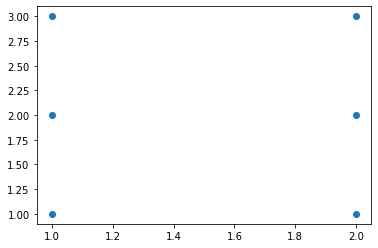

In [16]:
plt.scatter(cluster1_x, cluster1_y)

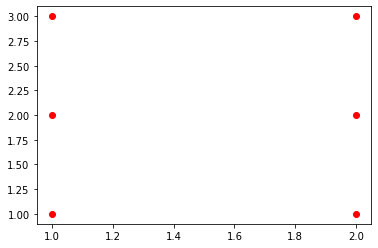

In [17]:
plt.scatter(cluster1_x, cluster1_y, color='red', label='cluster1')

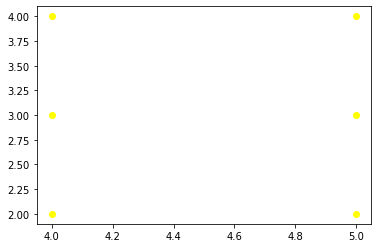

In [18]:
plt.scatter(cluster2_x, cluster2_y, color='yellow', label='cluster2')

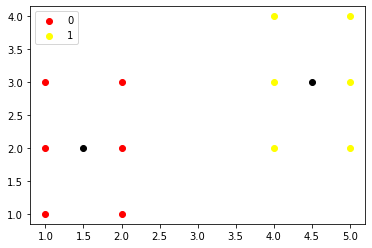

In [38]:
for i in [0, 1]:
    if i == 0:
        plt.scatter(cluster1_x, cluster1_y, color='red', label=i)
    else:
        plt.scatter(cluster2_x, cluster2_y, color='yellow', label=i)
plt.scatter([cluster1_mean[0], cluster2_mean[0]], [cluster1_mean[1], cluster2_mean[1]], color='black')
plt.legend()
plt.show()